In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('Debernardi et al 2020 data.csv')

In [69]:
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [70]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [71]:
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


# Handling NAN values

In [72]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]

In [73]:
del(df['stage'])
del(df['benign_sample_diagnosis'])
del(df['sample_id'])

In [74]:
df = df.interpolate()

In [75]:
df.isna().sum()

patient_cohort    0
sample_origin     0
age               0
sex               0
diagnosis         0
plasma_CA19_9     0
creatinine        0
LYVE1             0
REG1B             0
TFF1              0
REG1A             0
dtype: int64

In [76]:
df['sex'].value_counts()

F    299
M    291
Name: sex, dtype: int64

In [77]:
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['sex'] = pd.to_numeric(df['sex'], errors='coerce')

In [78]:
df['sex'].value_counts()

0    299
1    291
Name: sex, dtype: int64

In [79]:
df['patient_cohort'] = df['patient_cohort'].map({'Cohort1': 1, 'Cohort2': 0})
df['patient_cohort'] = pd.to_numeric(df['patient_cohort'], errors='coerce')

In [80]:
df['patient_cohort'].value_counts()

1    332
0    258
Name: patient_cohort, dtype: int64

In [81]:
df['sample_origin'] = df['sample_origin'].map({'BPTB': 0, 'LIV': 1,'ESP': 2,'UCL': 3})
df['sample_origin'] = pd.to_numeric(df['sample_origin'], errors='coerce')

In [82]:
df["sample_origin"].value_counts()

0    409
1    132
2     29
3     20
Name: sample_origin, dtype: int64

In [83]:
target='diagnosis'
x = df.drop(target, axis=1)
y = df[target]
x

,patient_cohort,sample_origin,age,sex,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,1,0,33,0,11.70,1.83222,0.893219,52.948840,654.282174,1262.000000
1,1,0,81,0,9.35,0.97266,2.037585,94.467030,209.488250,228.407000
2,0,0,51,1,7.00,0.78039,0.145589,102.366000,461.141000,253.603727
3,0,0,61,1,8.00,0.70122,0.002805,60.579000,142.950000,278.800455
4,0,0,62,1,9.00,0.21489,0.000860,65.540000,41.088000,303.997182
...,...,...,...,...,...,...,...,...,...,...
585,0,0,68,1,7614.00,0.52026,7.058209,156.241000,525.178000,7765.750000
586,0,0,71,0,6082.50,0.85956,8.341207,16.915000,245.947000,9124.312500
587,0,0,63,1,4551.00,1.36851,7.674707,289.701000,537.286000,10482.875000
588,0,0,75,0,3019.50,1.33458,8.206777,205.930000,722.523000,11841.437500


In [84]:
#Spliting dataset into training set and testing test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [85]:
# Feature selection
from sklearn.feature_selection import chi2
fscore = chi2(X_train, y_train) # to avoid overfitting by leaking the info to the model
fscore

(array([2.43741101e+01, 1.01242116e+02, 2.00837297e+02, 5.15560119e+00,
        4.47440081e+05, 3.62495018e+00, 6.44893035e+02, 3.16755286e+04,
        1.55444652e+05, 1.09813661e+05]),
 array([5.09599787e-006, 1.03646284e-022, 2.44756929e-044, 7.59408451e-002,
        0.00000000e+000, 1.63249579e-001, 9.18875631e-141, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000]))

In [86]:
pvalues = pd.Series(fscore[1])
pvalues.index = X_train.columns
pvalues

patient_cohort     5.095998e-06
sample_origin      1.036463e-22
age                2.447569e-44
sex                7.594085e-02
plasma_CA19_9      0.000000e+00
creatinine         1.632496e-01
LYVE1             9.188756e-141
REG1B              0.000000e+00
TFF1               0.000000e+00
REG1A              0.000000e+00
dtype: float64

In [87]:
pvalues.sort_values(ascending=False)

creatinine         1.632496e-01
sex                7.594085e-02
patient_cohort     5.095998e-06
sample_origin      1.036463e-22
age                2.447569e-44
LYVE1             9.188756e-141
plasma_CA19_9      0.000000e+00
REG1B              0.000000e+00
TFF1               0.000000e+00
REG1A              0.000000e+00
dtype: float64

In [88]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
X_train

array([[ 0.85007514, -0.57890946, -0.66059411, ..., -0.46387297,
        -0.40750317, -0.50385442],
       [ 0.85007514,  0.78051972, -0.13605603, ..., -0.50253947,
         0.09909953, -0.5608212 ],
       [ 0.85007514, -0.57890946, -0.43579208, ..., -0.43338056,
        -0.10777631, -0.4722572 ],
       ...,
       [ 0.85007514, -0.57890946, -1.40993423, ...,  0.0749887 ,
        -0.25401438,  2.71280864],
       [-1.1763666 , -0.57890946,  1.13782216, ..., -0.45233552,
        -0.44604265,  0.32946766],
       [ 0.85007514, -0.57890946, -0.43579208, ..., -0.01239839,
        -0.16486638, -0.27996919]])

In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
pred_y = model.predict(X_test)
pred_y

array([2, 1, 1, 3, 1, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 3, 2, 1, 3, 3, 3, 2,
       1, 2, 3, 1, 1, 2, 1, 2, 1, 3, 1, 2, 2, 2, 1, 3, 1, 1, 1, 3, 1, 2,
       3, 1, 2, 2, 1, 1, 2, 2, 1, 3, 3, 1, 1, 3, 2, 2, 1, 2, 1, 2, 3, 3,
       2, 3, 3, 2, 2, 2, 1, 1, 2, 1, 3, 3, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3,
       3, 3, 2, 1, 3, 2, 1, 1, 1, 3, 3, 3, 2, 3, 2, 1, 2, 2, 1, 3, 1, 3,
       1, 2, 1, 1, 2, 1, 1, 3], dtype=int64)

In [91]:
y_test

225    2
14     1
85     1
418    3
132    1
      ..
142    1
298    2
205    2
231    2
210    2
Name: diagnosis, Length: 118, dtype: int64

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_y)

0.7627118644067796

# Confusion Matrix

In [93]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test,pred_y)
print(confusion)

[[29  2  0]
 [13 29  2]
 [ 5  6 32]]


# Confusion Matrix as heatmap

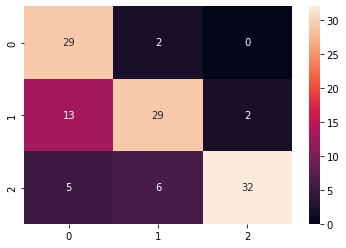

In [94]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_y)
f = sns.heatmap(cm, annot=True, fmt='d')

# Recall

In [95]:
from sklearn.metrics import recall_score
recall_score(y_test, pred_y, average='macro')

0.7795869421900928

# Precision

In [96]:
from sklearn.metrics import precision_score
precision_score(y_test, pred_y, average='macro')

0.7806605103225879

# F1 score

In [97]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_y, average='macro')

0.7636026524915414

# Classification Report

In [98]:
from sklearn.metrics import classification_report
# classification_report(y_test, pred_y)
target_names = ['healthy', 'non-PDAC', 'PDAC']
print(f'Classification Report: \n{classification_report(y_test, pred_y, target_names=target_names)}\n')
print("")

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy = ", accuracy_score(y_test, pred_y))

Classification Report: 
              precision    recall  f1-score   support

     healthy       0.62      0.94      0.74        31
    non-PDAC       0.78      0.66      0.72        44
        PDAC       0.94      0.74      0.83        43

    accuracy                           0.76       118
   macro avg       0.78      0.78      0.76       118
weighted avg       0.80      0.76      0.77       118



Accuracy =  0.7627118644067796


# Specificity

In [99]:
# code it based on the confusion matrix

# Class - 1
sp1 = (cm[1,1]+cm[2,2])/(cm[1,0]+cm[2,0]+cm[1,1]+cm[2,2])
# Class - 2
sp2 = (cm[0,0]+cm[2,2])/(cm[0,1]+cm[2,1]+cm[0,0]+cm[2,2])
# Class - 3
sp3 = (cm[0,0]+cm[1,1])/(cm[0,2]+cm[1,2]+cm[0,0]+cm[1,1])

print(sp1, sp2, sp3)

0.7721518987341772 0.8840579710144928 0.9666666666666667


# Overall